# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely. this might introduce a bias when numstim>2

In [30]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
def plt_loss_acc(loss,acc,ax1=None,episodes_per_sess=2000):
  if ax1 == None: ax1 = plt.gca()
  ax1.plot(train_acc,c='b')
  ax1.set_ylabel('accuracy')
  ax2 = ax1.twinx()
  ax2.plot(train_loss,c='r')
  ax2.set_ylabel('loss')
  ax1.set_xticks(np.arange(0,len(loss)+1,episodes_per_sess))
  ax1.grid(True,c='green',axis='x')
  

In [152]:
cell_size = 30
depth = 20
numstim = 2
numback = 7

# initialize
ML = MetaLearner(cell_size,depth=depth,numstim=numstim,preunroll=numback)
trainer = Trainer(ML,numback)

ADAM005


In [160]:
NUM_EPOCHS = 2000
EPOCHS_PER_SESSION = 500
ML.reinitialize()
train_loss,train_acc = trainer.train_loop(NUM_EPOCHS,EPOCHS_PER_SESSION)

randomizing params
0.0 0.65825325
0.05 0.64402074
0.1 0.7000993
0.15 0.68027526
0.2 0.6939784
0.25 0.71010387
0.3 0.69276553
0.35 0.6913023
0.4 0.69023526
0.45 0.67481077
0.5 0.69121814
0.55 0.691969
0.6 0.69867104
0.65 0.6924407
0.7 0.69626844
0.75 0.6919831
0.8 0.6846653
0.85 0.6930234
0.9 0.6938558
0.95 0.6756931


In [163]:
loss,acc = trainer.eval_loop(100)
loss.shape

(100, 13)

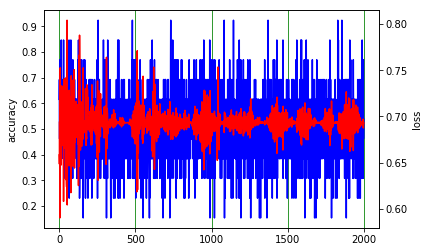

In [161]:
plt_loss_acc(train_loss,train_acc,None,500)

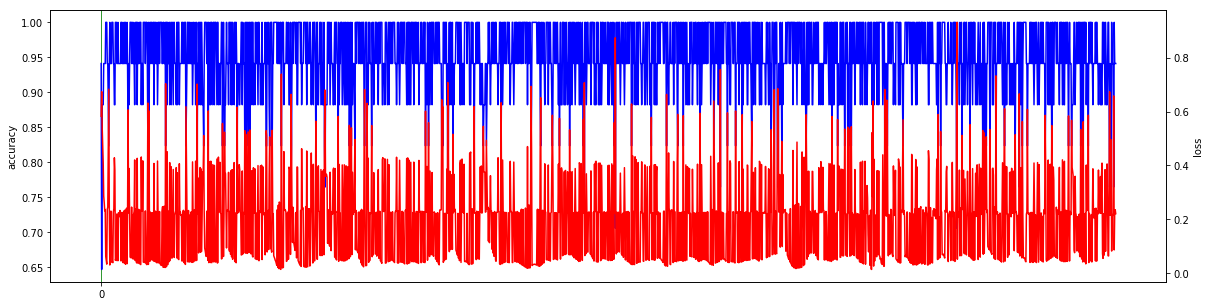

<Figure size 1080x288 with 0 Axes>

In [117]:
plt.figure(figsize=(20,5))
plt_loss_acc(train_loss,train_acc,plt.gca())

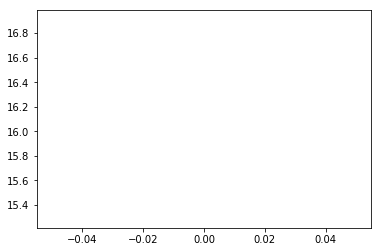

In [127]:
plt.plot(np.mean(eval_acc,0))

In [130]:
eval_acc.shape

(10,)

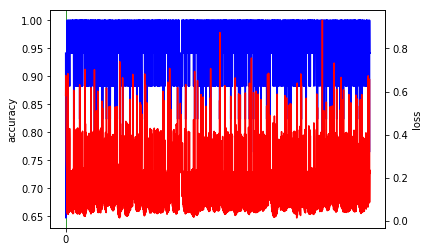

<Figure size 1080x288 with 0 Axes>

In [129]:
eval_loss,eval_acc = trainer.eval_loop(num_itr=10)

plt_loss_acc(eval_loss,eval_acc,plt.gca())

### nback_trainsave.py

In [38]:
# ## NBACK_CLASSIFICATION BRANCH 

# import numpy as np
# from nback import *

# cell_size = 30
# depth = 40
# num_stim = 10
# numback = 10

# NUM_EPOCHS = 10000
# EPOCHS_PER_SESSION = 5000 

# # initialize
# ML = MetaLearner(cell_size,depth=depth,num_stim=num_stim,preunroll=numback)
# trainer = Trainer(ML,numback)

# # train
# train_loss,train_acc = trainer.train_loop(NUM_EPOCHS,EPOCHS_PER_SESSION)

# # save
# model_dir = 'models/sweep_N/state_%i-depth_%i-numstim_%i-nback_%i/'%(cell_size,depth,num_stim,numback)
# ML.saver_op.save(ML.sess,model_dir+'final')
# np.save(model_dir+'train_loss',train_loss)
# np.save(model_dir+'train_acc',train_loss)


# load and plot

### train loss and acc

In [170]:
mdirL = glob('models/sweep_N/*')
fpath = mdirL[0]
print(fpath)
mdirL

models/sweep_N/state_30-depth_50-numstim_2-nback_9


['models/sweep_N/state_30-depth_50-numstim_2-nback_9',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_7',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_6',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_8',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_10',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_5',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_13']

In [84]:
# numstim = int(fpath.split('-')[2].split('_')[1])
# numback = int(fpath.split('-')[3].split('_')[1])
# train_acc = np.load(fpath+'/train_acc.npy')
# train_loss = np.load(fpath+'/train_loss.npy')

models/sweep_N/state_30-depth_50-numstim_4-nback_10


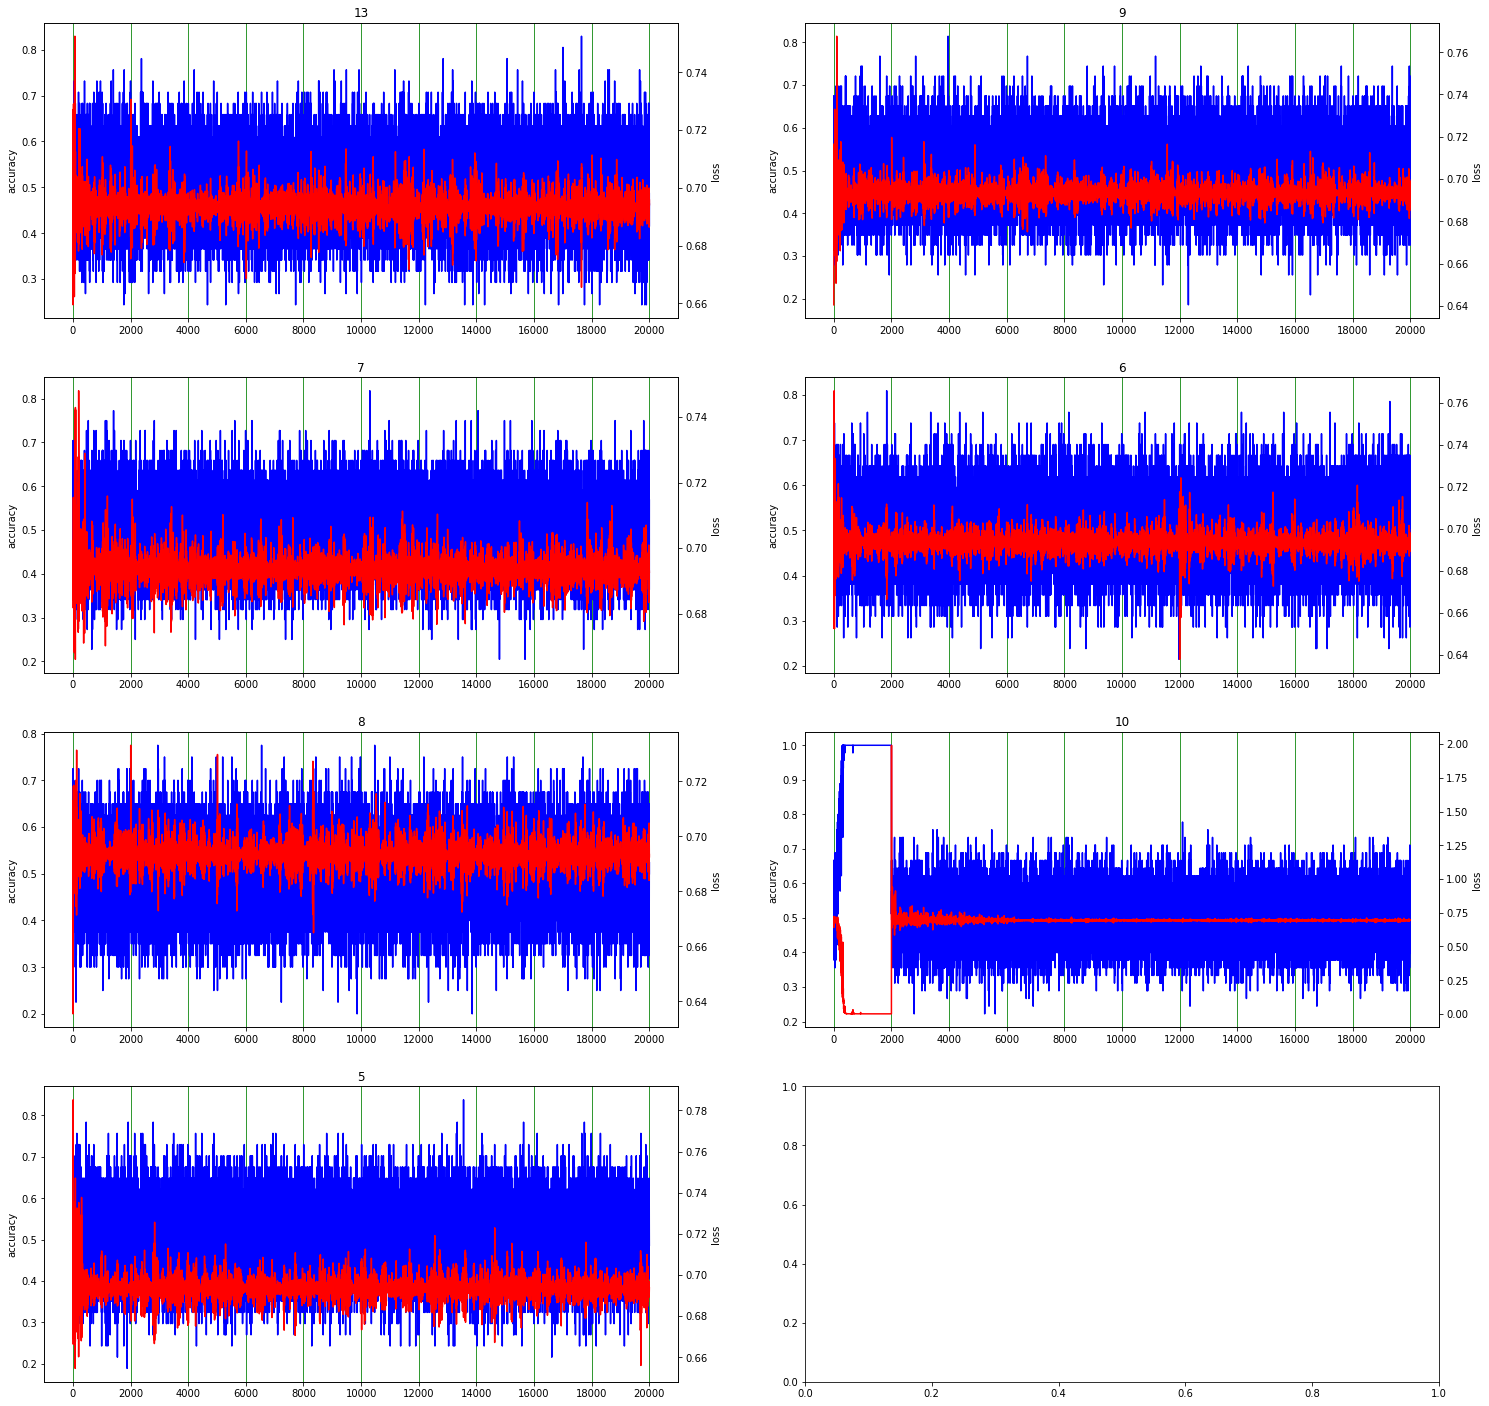

In [178]:
plt.close('all')
fig,axarr = plt.subplots(int(len(mdirL)/2)+1,2,figsize=(25,25));axarr = axarr.reshape(-1)
for idx in range(len(mdirL)):
  numback = int(fpath.split('-')[3].split('_')[1])
  fpath = mdirL[idx]
  ax = axarr[idx]
  ax.set_title(numback)
  train_acc = np.load(fpath+'/train_acc.npy')
  train_loss = np.load(fpath+'/train_loss.npy')
  plt_loss_acc(train_loss,train_acc,ax)


## load and eval trained model

In [181]:
mdirL

['models/sweep_N/state_30-depth_50-numstim_2-nback_9',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_7',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_6',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_8',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_10',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_5',
 'models/sweep_N/state_30-depth_50-numstim_2-nback_13']

In [193]:
dirpath = mdirL[0]
dirpath+'/final'
stsize = 30
depth = 20
numstim = 2
nback = int(dirpath.split('-')[3].split('_')[1])

ML = MetaLearner(cell_size,depth=depth,numstim=numstim,preunroll=0)

ADAM005


In [194]:
trainer = Trainer(ML,numback=numback)

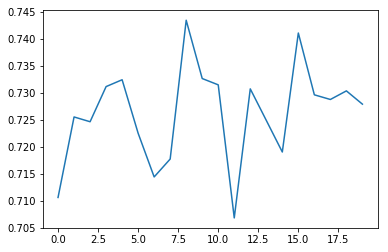

In [198]:
eval_loss,eval_acc = trainer.eval_loop(1000)
plt.plot(np.mean(eval_loss,0))

In [81]:
cell_size = 30
depth = 40
model_dir = 'models/sweep_N/state_%i-depth_%i-numstim_%i-nback_%i/'%(cell_size,depth,numstim,numback)

In [82]:
train_acc = np.load(model_dir+'train_acc.npy')
train_loss = np.load(model_dir+'train_loss.npy')
train_acc.shape,train_loss.shape

FileNotFoundError: [Errno 2] No such file or directory: 'models/sweep_N/state_30-depth_40-numstim_4-nback_10/train_acc.npy'

In [108]:
task = NBackTask(numback)
Xdata,Ydata = task.gen_seq(30,2)

In [148]:
loss,acc = trainer.eval_loop(10)

In [149]:
acc

array([14., 18., 14., 29., 29., 15., 23., 29., 13., 13.])

In [137]:
trainer.net.sess.run(trainer.net.randomize_emat)
loss,yhat,ybatch = trainer.eval_step(Xdata,Ydata)
np.sum(ybatch.argmax(2) == yhat.argmax(2))

12

[autoreload of nback failed: Traceback (most recent call last):
  File "/Users/abeukers/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/abeukers/wd/epm/nback.py", line 207
    eval_loss = self.net.sess.run([self.net.eval_loss,self.net.],feed_dict)
                                                               ^
SyntaxError: invalid syntax
]


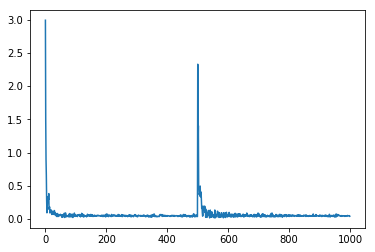

In [54]:
plt.plot(train_loss)

In [ ]:
tf.